![logo](1_bDwEvCRgrKVbLrAXEixpfA.png)
___

##### importing libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

import functools as ft

#bag of words model
from sklearn.feature_extraction.text import CountVectorizer
import re

#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


#classification 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

# Step 5 - Classification I: Intitial Findings
# Original & Resampled Data
    a) Importing Data
    
    b) Resampling
        i) Random Over Sampling
       ii) Random Under Sampling  
       
    c) Classification
        i) Naive Bayes
            - Original
            - Over-sampled
            - Under-sampled
       ii) Logistic Regression
            - Original
            - Over-sampled
            - Under-sampled
      iii) K-Nearest Neighbours
            - Original
            - Over-sampled
            - Under-sampled

## a) Importing data

In [2]:
#import cleaned2_data.csv file
cleaned2_df = pd.read_csv("cleaned2_data.csv")

cleaned2_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned2_df.shape)

(77926, 22)


In [3]:
#import corpus_data.csv file
corpus_df = pd.read_csv("corpus_data.csv")

corpus_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(corpus_df.shape)
corpus_df.head()

(77926, 1)


,blurb
0,educating community self sufficiency building ...
1,thema literary society proposes publish one th...
2,collection hand lettered thing say idea sentim...
3,genesis follows mother son live together forei...
4,help u bring art culture ballet community cent...


In [4]:
#append corpus blurb to cleaned2_df
cleaned2_df['blurb_corpus'] = corpus_df['blurb']
cleaned2_df.head(1)

,id,name,genre,subgenre,category,source_url,blurb,slug,goal,converted_pledged_amount,...,country,currency,backers_count,disable_communication,is_starrable,spotlight,staff_pick,state,success_percentage,blurb_corpus
0,1526833653,Living Life Tiny,Architecture,design,"{""id"":258,""name"":""Architecture"",""slug"":""design...",https://www.kickstarter.com/discover/categorie...,Educating my community about self-sufficiency ...,living-life-tiny,500,577,...,US,USD,13,0,0,1,0,successful,115.4,educating community self sufficiency building ...


In [5]:
#locate NaN
is_NaN = cleaned2_df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = cleaned2_df[row_has_NaN]

#remove NaN
cleaned2_df = cleaned2_df.dropna()
print(cleaned2_df.isna().sum())
print(cleaned2_df.shape)

id                          0
name                        0
genre                       0
subgenre                    0
category                    0
source_url                  0
blurb                       0
slug                        0
goal                        0
converted_pledged_amount    0
created_at                  0
launched_at                 0
deadline                    0
country                     0
currency                    0
backers_count               0
disable_communication       0
is_starrable                0
spotlight                   0
staff_pick                  0
state                       0
success_percentage          0
blurb_corpus                0
dtype: int64
(77916, 23)


### SPLIT DATA BEFORE RESAMPLING

In [6]:
msk = np.random.rand(len(cleaned2_df)) < 0.75

train_df = cleaned2_df[msk]
test_df = cleaned2_df[~msk]

In [7]:
print(len(test_df))
print(len(train_df))

19303
58613


In [8]:
#split test into X_test and y_test for later
y_test = test_df['state']
X_test = test_df.drop('state',axis=1)

## b) Resampling

In [9]:
#change successful:1 / failed:0 in state column (y-dependent-variable)
print(train_df['state'].unique())
train_df.state.replace(['successful', 'failed'], [1, 0], inplace=True)
print(train_df['state'].unique())

['successful' 'failed']
[1 0]


C:\Users\vlad_\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [10]:
#change successful:1 / failed:0 in state column (y-dependent-variable)
print(test_df['state'].unique())
test_df.state.replace(['successful', 'failed'], [1, 0], inplace=True)
print(test_df['state'].unique())

['successful' 'failed']
[1 0]


In [11]:
train_df['state'].value_counts()

1    41863
0    16750
Name: state, dtype: int64

In [12]:
#class count
count_class_1, count_class_0 = train_df.state.value_counts()

#divide by class
df_class_0 = train_df[train_df['state'] == 0]
df_class_1 = train_df[train_df['state'] == 1]

##### i) Random Over-Sampling

Random over-sampling:
1    41863
0    41863
Name: state, dtype: int64


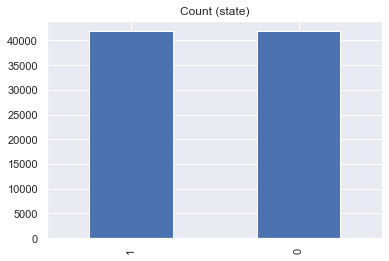

In [13]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random over-sampling:')
print(df_test_over.state.value_counts())

df_test_over.state.value_counts().plot(kind='bar', title='Count (state)')

##### ii) Random under-sampling

Random under-sampling:
1    16750
0    16750
Name: state, dtype: int64


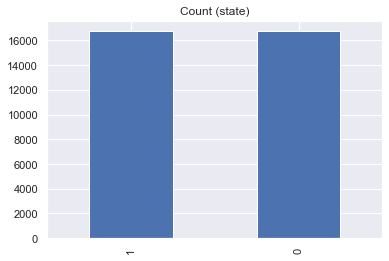

In [14]:
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
df_test_under['state'].value_counts()
print('Random under-sampling:')
print(df_test_under.state.value_counts())

df_test_under.state.value_counts().plot(kind='bar', title='Count (state)')

## c) Classification (Original data, Oversampled data, Undersampled data)

The following lines will include classification algorithms using 3 types of data: the original data with outliers removed, oversampled data, and undersampled data.

### i) NAIVE BAYES
##### original data

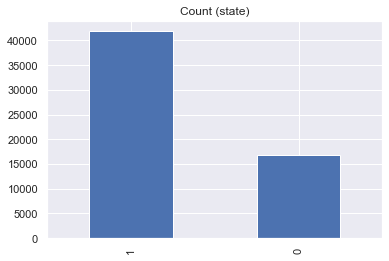

In [15]:
train_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [16]:
#split into X_train and y_train
y_train = train_df['state']
X_train = train_df.drop('state',axis=1)

In [17]:
#use 10,000 most frequent n-grams(3) from train set in bag of words model
cv = CountVectorizer(max_features = 10000, ngram_range =(3, 3)) 
X_vec_train = cv.fit_transform(X_train['blurb_corpus'])  
print(X_vec_train.shape)
X_vec_train

(58613, 10000)


<58613x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 38144 stored elements in Compressed Sparse Row format>

In [18]:
#apply TDIDF on train set
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_vec_train)
X_train_tfidf.shape

(58613, 10000)

In [19]:
#use 10,000 most frequent n-grams(3) from test set in bag of words model
cv = CountVectorizer(max_features = 10000, ngram_range =(3, 3))
X_vec_test = cv.fit_transform(X_test['blurb_corpus'])
print(X_vec_test.shape)
X_vec_test

(19303, 10000)


<19303x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 20481 stored elements in Compressed Sparse Row format>

In [20]:
#apply TDIDF on test set
tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_vec_test)
X_test_tfidf.shape

(19303, 10000)

In [21]:
##########################################OTHER METHOD#################################################

#use 10,000 most frequent words in train set bag of words model
#cv = CountVectorizer(max_features = 10000)
#X_vec_train = cv.fit_transform(X_train['blurb_corpus'].apply(lambda X: np.str_(X))).toarray()
#print(X_vec_train.shape)
#X_vec_train

#apply TDIDF
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_vec_train)
#X_train_tfidf.shape

#use 10,000 most frequent words from test set in bag of words model
#cv = CountVectorizer(max_features = 10000)
#X_vec_test = cv.fit_transform(X_test['blurb_corpus'].apply(lambda X: np.str_(X))).toarray()
#print(X_vec_test.shape)
#X_vec_test

#tfidf_transformer = TfidfTransformer()
#X_test_tfidf = tfidf_transformer.fit_transform(X_vec_test)
#X_test_tfidf.shape

In [22]:
#create dependent variable with 'state' column for train set
y_vec_train = y_train.values
print(y_vec_train.shape)
y_vec_train

(58613,)


array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
#create dependent variable with 'state' column for test set
y_vec_test = y_test.values
print(y_vec_test.shape)
y_vec_test

(19303,)


array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [24]:
#change sparse matrix to dense 
X_train_tfidf = X_train_tfidf.todense()
X_test_tfidf = X_test_tfidf.todense()

Confusion matrix:
 [[  167  5326]
 [  579 13231]]


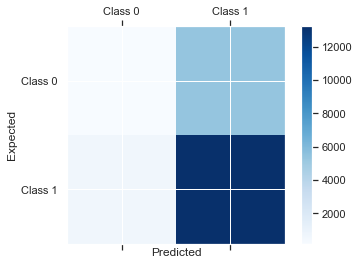

In [25]:
#fitting Naive Bayes to the training set
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_vec_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test_tfidf)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_vec_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [26]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 69.41%
 Precision: 71.30%
    Recall: 95.81%
  F1 score: 81.76%
 ROC score: 49.42%


##### over-sampled data

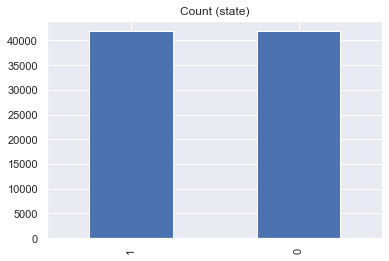

In [32]:
df2_test_over_df = pd.DataFrame(df_test_over)
df2_test_over_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [33]:
X_over_train = df2_test_over_df.drop('state',axis=1)
y_over_train = df2_test_over_df['state']

In [34]:
#use 10,000 most frequent n-grams(3) from train set in bag of words model
cv = CountVectorizer(max_features = 10000, ngram_range =(3, 3)) 
X_over_train = cv.fit_transform(X_over_train['blurb_corpus'])
print(X_over_train.shape)
X_over_train

(83726, 10000)


<83726x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 75141 stored elements in Compressed Sparse Row format>

In [35]:
#apply TDIDF on train set
tfidf_transformer = TfidfTransformer()
X_over_train_tfidf = tfidf_transformer.fit_transform(X_over_train)
X_over_train_tfidf.shape

(83726, 10000)

In [36]:
#change sparse matrix to dense 
X_over_train_tfidf = X_over_train_tfidf.todense()

Confusion matrix:
 [[ 5163   330]
 [12822   988]]


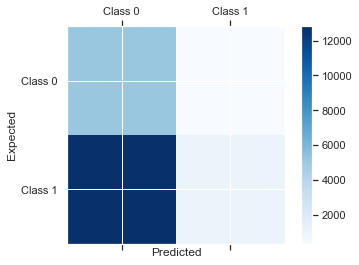

In [37]:
#fitting Naive Bayes to the training set
nb_classifier = MultinomialNB()
nb_classifier.fit(X_over_train_tfidf, y_over_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test_tfidf)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_vec_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [44]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 31.87%
 Precision: 74.96%
    Recall: 7.15%
  F1 score: 13.06%
 ROC score: 50.57%


##### under-sampled data

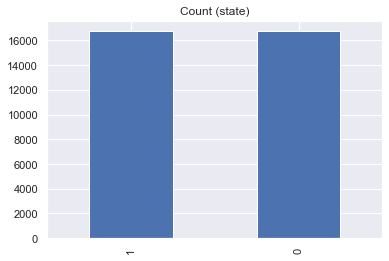

In [45]:
df2_test_under_df = pd.DataFrame(df_test_under)
df2_test_under_df.state.value_counts().plot(kind='bar', title='Count (state)')

In [46]:
X_under_train = df2_test_under_df.drop('state',axis=1)
y_under_train = df2_test_under_df['state']

In [47]:
#use 10,000 most frequent words in train set bag of words model
cv = CountVectorizer(max_features = 10000,ngram_range = (3,3))
X_under_train = cv.fit_transform(X_under_train['blurb_corpus'])
print(X_under_train.shape)
X_under_train

(33500, 10000)


<33500x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 25619 stored elements in Compressed Sparse Row format>

In [48]:
#apply TDIDF on train set
tfidf_transformer = TfidfTransformer()
X_under_train_tfidf = tfidf_transformer.fit_transform(X_under_train)
X_under_train_tfidf.shape

(33500, 10000)

In [49]:
#change sparse matrix to dense 
X_under_train_tfidf = X_under_train_tfidf.todense()

Confusion matrix:
 [[ 4447  1046]
 [10304  3506]]


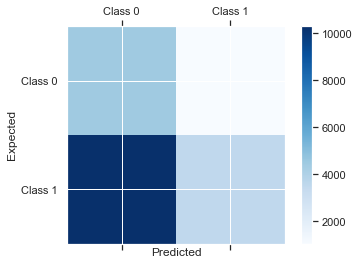

In [50]:
#fitting Naive Bayes to the training set
nb_classifier = MultinomialNB()
nb_classifier.fit(X_under_train_tfidf, y_under_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test_tfidf)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_vec_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [52]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 41.20%
 Precision: 77.02%
    Recall: 25.39%
  F1 score: 38.19%
 ROC score: 53.17%


### ii) Logistic Regression
##### original data

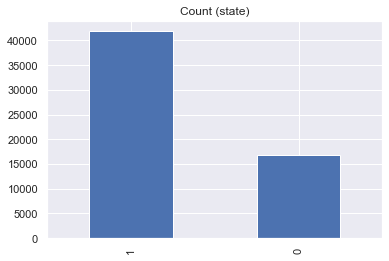

In [53]:
train_df.state.value_counts().plot(kind='bar', title='Count (state)')

C:\Users\vlad_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[   65  5428]
 [  228 13582]]


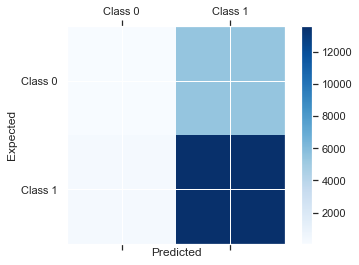

In [54]:
#fitting Logistic Regression to the training set
reg_classifier = LogisticRegression()
reg_classifier.fit(X_vec_train, y_vec_train)

#predicting the test set results
y_pred = reg_classifier.predict(X_vec_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_vec_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [55]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 70.70%
 Precision: 71.45%
    Recall: 98.35%
  F1 score: 82.77%
 ROC score: 49.77%


##### over-sampled data

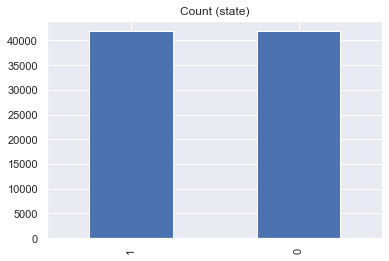

In [56]:
df2_test_over_df = pd.DataFrame(df_test_over)
df2_test_over_df.state.value_counts().plot(kind='bar', title='Count (state)');

Confusion matrix:
 [[1509 3984]
 [5256 8554]]


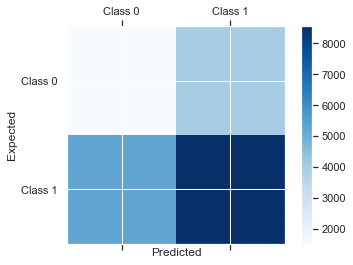

In [57]:
#fitting Logistic Regression to the training set
reg_classifier = LogisticRegression()
reg_classifier.fit(X_over_train, y_over_train)

#predicting the test set results
y_pred = reg_classifier.predict(X_vec_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_vec_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [58]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 52.13%
 Precision: 68.22%
    Recall: 61.94%
  F1 score: 64.93%
 ROC score: 44.71%


##### under-sampled data

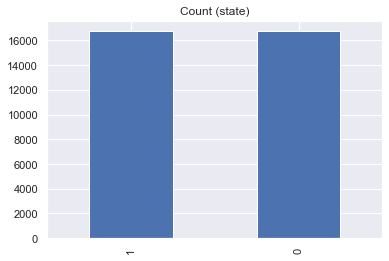

In [59]:
df2_test_under_df = pd.DataFrame(df_test_under)
df2_test_under_df.state.value_counts().plot(kind='bar', title='Count (state)')

Confusion matrix:
 [[4363 1130]
 [9745 4065]]


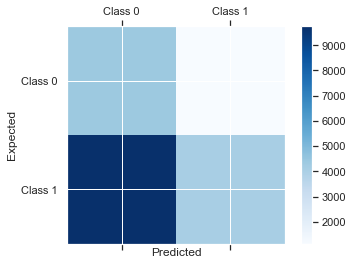

In [60]:
#fitting Logistic Regression to the training set
reg_classifier = LogisticRegression()
reg_classifier.fit(X_under_train_tfidf, y_under_train)

#predicting the test set results
y_pred = reg_classifier.predict(X_test_tfidf)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_vec_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [61]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 43.66%
 Precision: 78.25%
    Recall: 29.44%
  F1 score: 42.78%
 ROC score: 54.43%


### K-Nearest Neighbour
##### original data

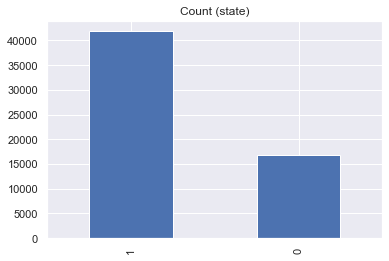

In [63]:
train_df.state.value_counts().plot(kind='bar', title='Count (state)')

Confusion matrix:
 [[  209  5284]
 [  700 13110]]


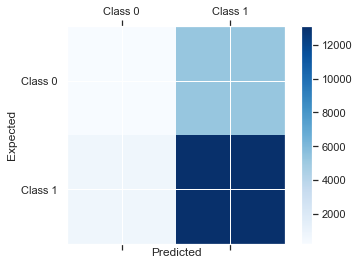

In [64]:
#fitting KNN to the training set
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_vec_train, y_vec_train)

#predicting the test set results
y_pred = knn_classifier.predict(X_vec_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_vec_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [66]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 69.00%
 Precision: 71.27%
    Recall: 94.93%
  F1 score: 81.42%
 ROC score: 49.37%


##### over-sampled data

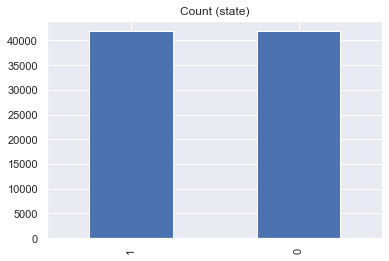

In [67]:
df2_test_over_df = pd.DataFrame(df_test_over)
df2_test_over_df.state.value_counts().plot(kind='bar', title='Count (state)');

Confusion matrix:
 [[ 5202   291]
 [12602  1208]]


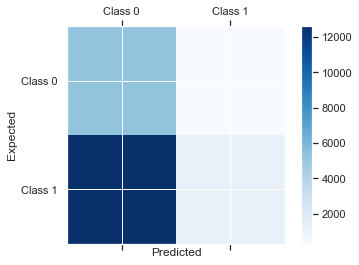

In [68]:
#fitting KNN to the training set
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_over_train, y_over_train)

#predicting the test set results
y_pred = knn_classifier.predict(X_vec_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_vec_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [69]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 33.21%
 Precision: 80.59%
    Recall: 8.75%
  F1 score: 15.78%
 ROC score: 51.72%


##### under-sampled data

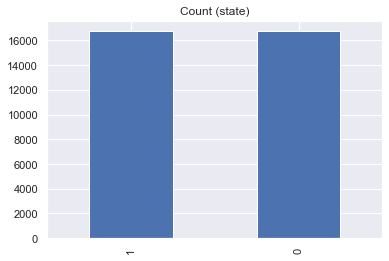

In [70]:
df2_test_under_df = pd.DataFrame(df_test_under)
df2_test_under_df.state.value_counts().plot(kind='bar', title='Count (state)');

Confusion matrix:
 [[  127  5366]
 [  778 13032]]


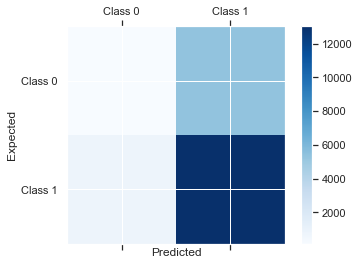

In [71]:
#fitting KNN to the training set
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_under_train, y_under_train)

#predicting the test set results
y_pred = knn_classifier.predict(X_vec_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_vec_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [72]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 68.17%
 Precision: 70.83%
    Recall: 94.37%
  F1 score: 80.92%
 ROC score: 48.34%


### End of Step 5